<a href="https://www.kaggle.com/code/kaixiongf/credit-card-fraud-detection?scriptVersionId=101452307" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## **OVERVIEW**

1. UNDERSTANDING THE SHAPE OF THE DATA
1. DATA CLEANING AND EXPLORATION
1. FEATURE ENGINEERING
1. DATA PREPROCESSING FOR MODEL
1. BASIC MODEL BUILDING
1. MODEL TUNING
1. ENSEMBLE MODEL BUILDING
1. FINAL RESULTS

Reference Data: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud \

## **Establishing Environment**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **1. UNDERSTANDING SHAPE OF DATA**

In [2]:
df0 = pd.read_csv('../input/creditcardfraud/creditcard.csv')
df0

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [3]:
df0.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


From the mean values, we can see that the class and amount column is heavily skewed

In [4]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

# **2. DATA CLEANING AND EXPLORATION**

In [5]:
# Check for missing values, no null values as seen from info

df0.columns[df0.isna().any()]

Index([], dtype='object')

**There are no missing value**

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,284315,284315,284315,284315,284315,284315,284315,284315,284315,284315,...,284315,284315,284315,284315,284315,284315,284315,284315,284315,284315
1,492,492,492,492,492,492,492,492,492,492,...,492,492,492,492,492,492,492,492,492,492


<AxesSubplot:xlabel='Class', ylabel='count'>

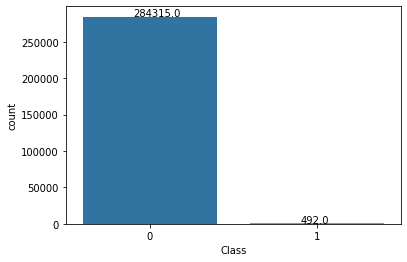

In [6]:
# How many fraud compared to non fraud
display(df0.groupby("Class").count())


class_bar=sns.countplot(x=df0["Class"])
ax = plt.gca()
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+500))
class_bar

0 = Not Fraud
1 = Fraud

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


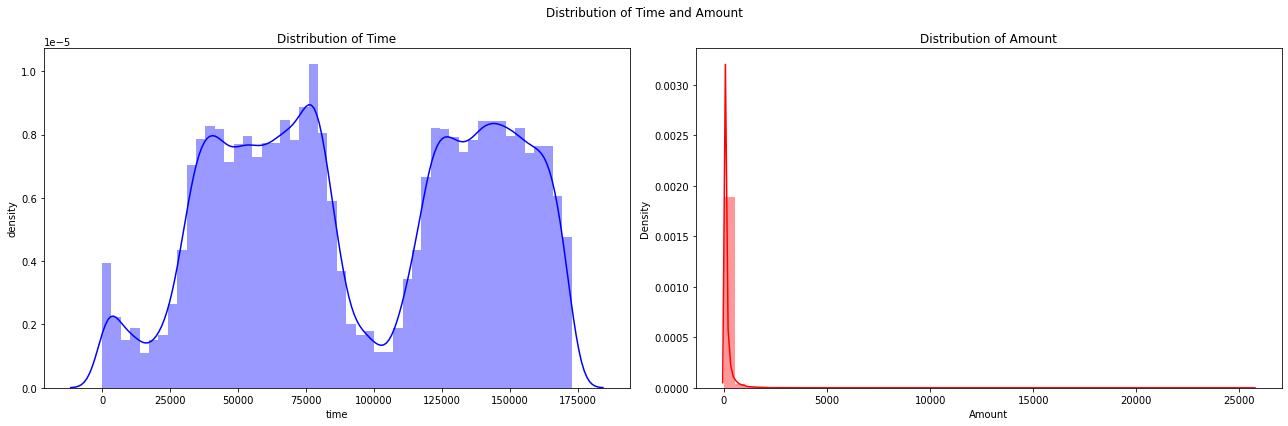

In [7]:
# Distribution of amount and time data

fig = plt.figure(figsize = (18,6))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

sns.distplot(df0["Time"],ax=ax1,color="Blue")
ax1.set_xlabel("time")
ax1.set_ylabel("density")
ax1.set_title("Distribution of Time")

sns.distplot(df0["Amount"], ax=ax2, color = 'red')
ax2.set_xlabel("Amount")
ax2.set_ylabel("Density")
ax2.set_title("Distribution of Amount")

fig.suptitle("Distribution of Time and Amount")
plt.tight_layout()
plt.show()

As we can see from the fraud vs non fraud cases, it is extremely skewed, this means that a sub sample is required. Ideally we will want to do a sub sample where fraud vs non fraud will be around 1:1.

Will have to normalise the values of time and amount

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

scaler = StandardScaler()
robust = RobustScaler()
scaled_time=robust.fit_transform(df0["Time"].values.reshape(-1,1))
scaled_amount=robust.fit_transform(df0["Amount"].values.reshape(-1,1))


# make a copy of original df
df1=df0.copy()

In [9]:
df1.insert(0,"scaled_time",scaled_time)
df1.insert(1,"scaled_amount",scaled_amount)
df1_scaled=df1.drop(columns=["Time","Amount"])
display(df1_scaled)

,scaled_time,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-0.994983,1.783274,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.994983,-0.269825,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,-0.994972,4.983721,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,-0.994972,1.418291,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-0.994960,0.670579,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,1.034951,-0.296653,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0
284803,1.034963,0.038986,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0
284804,1.034975,0.641096,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0
284805,1.034975,-0.167680,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,0


### **Sub Sampling**

To get equally distributed fraud vs non fraud to train the model

In [10]:
df1_scaled = df1_scaled.sample(frac=1)  #Shuffling the dataframe

df1_scaled_nf = df1_scaled.loc[df1["Class"] == 0][:492]
df1_scaled_f = df1_scaled.loc[df1["Class"]==1]

# Will reuse all fraud points, will random sample out 492 non-fraud points

# New sample Table
df1_distributed = pd.concat([df1_scaled_nf,df1_scaled_f])
df2 = df1_distributed.sample(frac=1, random_state=42)

df2.head()

,scaled_time,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
74496,-0.341616,-0.295815,-7.347955,2.397041,-7.572356,5.177819,-2.854838,-1.795239,-8.783235,0.437157,...,0.073164,-0.175273,0.543325,-0.547955,-0.503722,-0.310933,-0.163986,1.197895,0.378187,1
54458,-0.449206,0.555998,-2.161480,1.765527,0.097253,2.960728,-0.281370,-0.273893,-0.082618,1.039712,...,0.032144,-0.281450,-1.231896,-0.220004,-0.103786,0.213401,-0.076979,-0.280080,-0.300298,0
235644,0.749386,1.406833,-1.541678,3.846800,-7.604114,3.121459,-1.254924,-2.084875,-2.385027,1.471140,...,0.114760,1.096405,1.064222,0.065370,0.257209,-0.693654,-0.335702,0.577052,0.398348,1
77744,-0.323089,1.701530,0.949235,-0.517089,0.114136,-0.313848,-1.192243,-1.512606,-0.070997,-0.165488,...,0.104909,0.039059,0.001915,-0.166238,0.817136,0.517866,-0.669586,0.053716,0.080229,0
65467,-0.388809,1.916579,-1.133748,0.449194,0.952216,-1.733556,-1.025417,-0.861267,0.776161,0.293417,...,0.256767,0.206195,0.532062,0.183542,0.404907,0.160830,-0.829961,0.252437,0.159102,0


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Class', ylabel='count'>

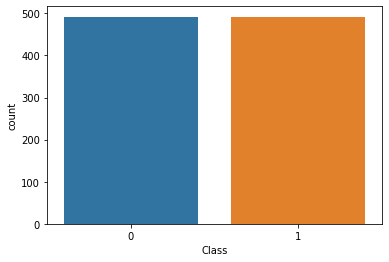

In [11]:
sub_sample_plot=sns.countplot(df2["Class"])
sub_sample_plot

Previously seen that data was very skewed on the time and amount, will check if it is still the same

# 3 & 4. Feature Engineering and Data Preprocessing

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


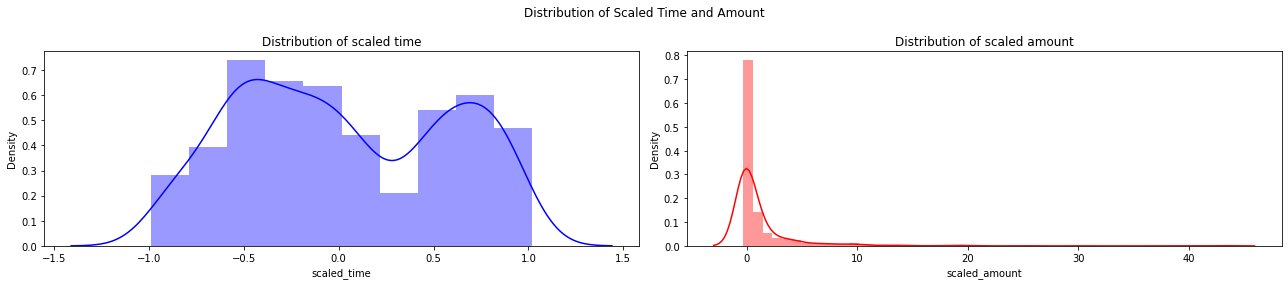

In [12]:
# Distribution plot of time and amount for sub sample

fig = plt.figure(figsize = (18,4))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

sns.distplot(df2["scaled_time"],ax=ax1, color="blue")
ax1.set_title("Distribution of scaled time")
sns.distplot(df2["scaled_amount"],ax=ax2, color="red")
ax2.set_title("Distribution of scaled amount")

fig.suptitle("Distribution of Scaled Time and Amount")
plt.tight_layout()
plt.show()

### **Comparing Correlation of original dataset and sub-sample dataset**

Text(0.5, 1.0, 'Correlation Heatmap of Sub-sample Dataset')

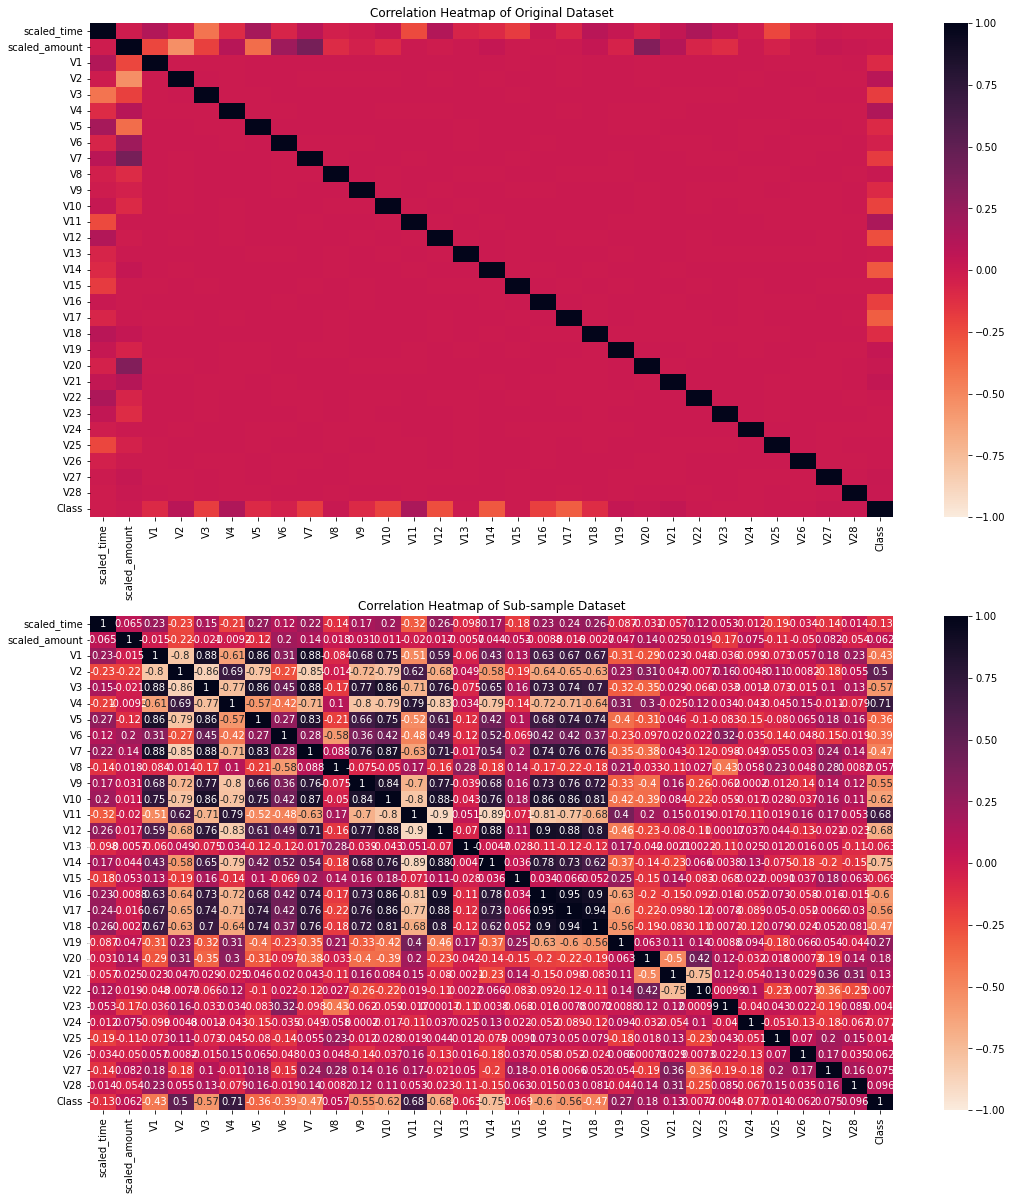

In [13]:
fig = plt.figure(figsize = (18,20))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

sns.heatmap(df1_scaled.corr(),ax=ax1, cmap = "rocket_r",vmin = -1, vmax = 1)
ax1.set_title("Correlation Heatmap of Original Dataset")

sns.heatmap(df2.corr(),ax=ax2, cmap = "rocket_r", vmin = -1, vmax = 1,annot=True)
ax2.set_title("Correlation Heatmap of Sub-sample Dataset")

#### **Observations from Heatmap**
From the heat map, it is observed that a few features are positively correlated to fraud, whereas some are negatively correlated to fraud\
Positive Correlation - Higher the value the higher the likelihood of fraud: v2, v4, v11, v19\
Negative Correlation - Lower the value the higher the likelihood of fraud: v10, v12, v14, v17

To understand the distribution of these features, will do a feature distribution and also box plot

**Note to self: Consider log distributions? and work with log features?**


#### **Feature Distribution**

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

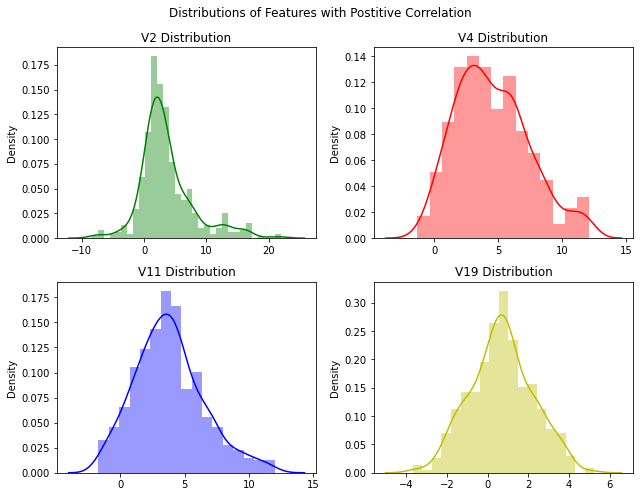

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

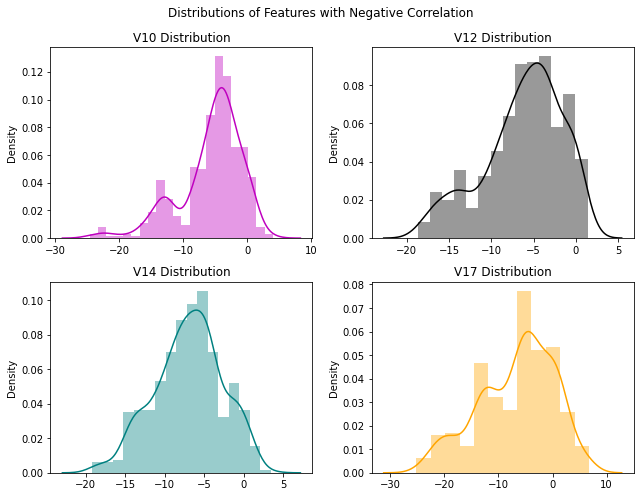

In [14]:
fig1 = plt.figure(figsize = (9,7))
ax1 = fig1.add_subplot(2,2,1)
ax2 = fig1.add_subplot(2,2,2)
ax3 = fig1.add_subplot(2,2,3)
ax4 = fig1.add_subplot(2,2,4)

V2_fraud_dist = df2["V2"].loc[df2["Class"]==1].values
sns.distplot(V2_fraud_dist,ax=ax1,color="g")
ax1.set_title("V2 Distribution")

V14_fraud_dist = df2["V4"].loc[df2["Class"]==1].values
sns.distplot(V14_fraud_dist,ax=ax2,color='r')
ax2.set_title("V4 Distribution")

V11_fraud_dist = df2["V11"].loc[df2["Class"]==1].values
sns.distplot(V11_fraud_dist,ax=ax3, color='b')
ax3.set_title("V11 Distribution")

V19_fraud_dist = df2["V19"].loc[df2["Class"]==1].values
sns.distplot(V19_fraud_dist,ax=ax4, color="y")
ax4.set_title("V19 Distribution")

fig1.suptitle("Distributions of Features with Postitive Correlation")
plt.tight_layout()
plt.show()


fig2 = plt.figure(figsize = (9,7))
ax5 = fig2.add_subplot(2,2,1)
ax6 = fig2.add_subplot(2,2,2)
ax7 = fig2.add_subplot(2,2,3)
ax8 = fig2.add_subplot(2,2,4)

V10_fraud_dist = df2["V10"].loc[df2["Class"]==1].values
sns.distplot(V10_fraud_dist,ax=ax5, color='m')
ax5.set_title("V10 Distribution")

V12_fraud_dist = df2["V12"].loc[df2["Class"]==1].values
sns.distplot(V12_fraud_dist,ax=ax6,color='k')
ax6.set_title("V12 Distribution")

V14_fraud_dist = df2["V14"].loc[df2["Class"]==1].values
sns.distplot(V14_fraud_dist,ax=ax7,color='teal')
ax7.set_title("V14 Distribution")

V17_fraud_dist = df2["V17"].loc[df2["Class"]==1].values
sns.distplot(V17_fraud_dist,ax=ax8,color='orange')
ax8.set_title("V17 Distribution")

fig2.suptitle("Distributions of Features with Negative Correlation")
plt.tight_layout()
plt.show()

#### **Box Plot**

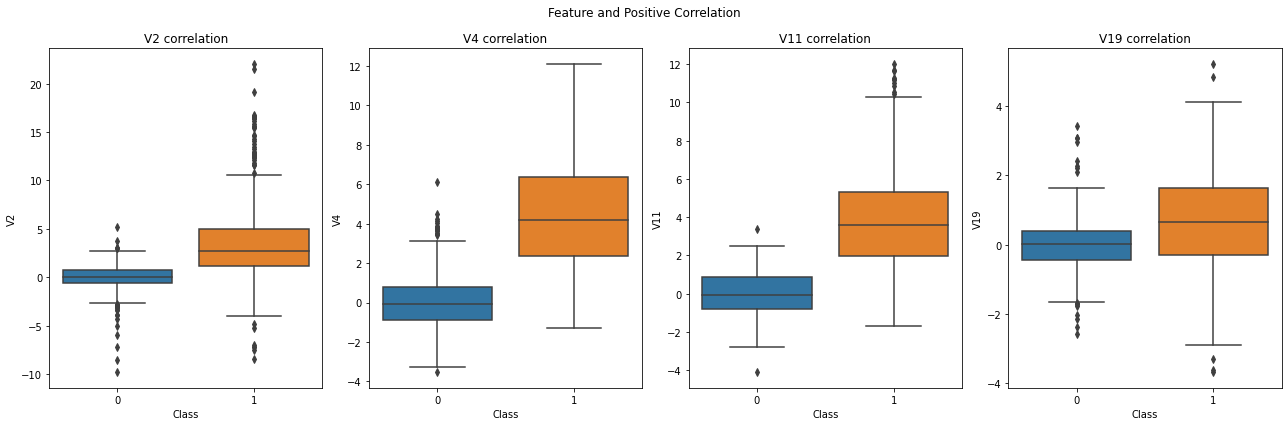

In [15]:
# Box Plot for Positive Correlations

fig = plt.figure(figsize=(18,6))
ax1 = fig.add_subplot(1,4,1)
ax2 = fig.add_subplot(1,4,2)
ax3 = fig.add_subplot(1,4,3)
ax4 = fig.add_subplot(1,4,4)

sns.boxplot(data = df2, x = "Class", y= "V2", ax=ax1)
ax1.set_title("V2 correlation")

sns.boxplot(data = df2, x = "Class", y= "V4", ax=ax2)
ax2.set_title("V4 correlation")

sns.boxplot(data = df2, x = "Class", y= "V11", ax=ax3)
ax3.set_title("V11 correlation")

sns.boxplot(data = df2, x = "Class", y= "V19", ax=ax4)
ax4.set_title("V19 correlation")

fig.suptitle("Feature and Positive Correlation")
plt.tight_layout()
plt.show()

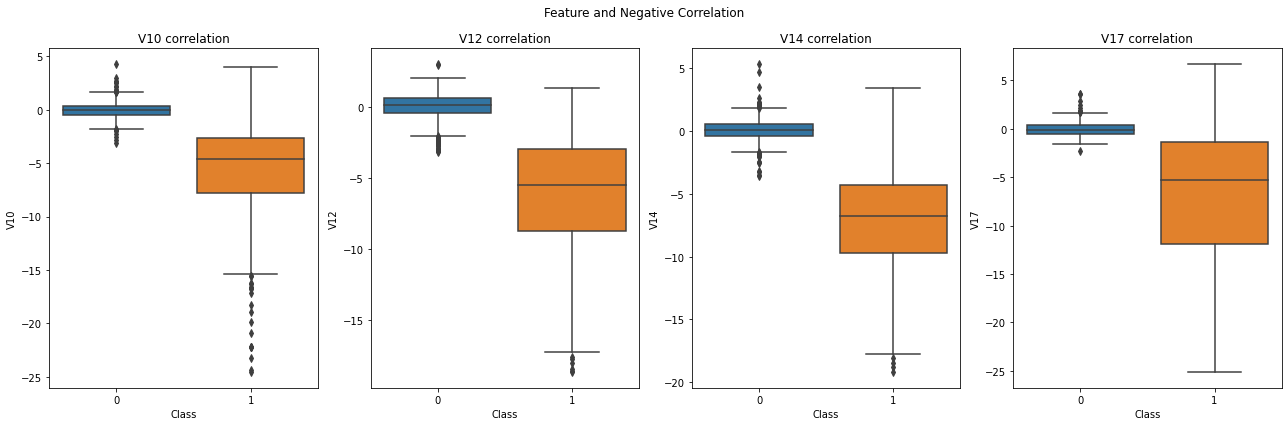

In [16]:
# Box Plot for Negative Correlations

fig = plt.figure(figsize=(18,6))
ax1 = fig.add_subplot(1,4,1)
ax2 = fig.add_subplot(1,4,2)
ax3 = fig.add_subplot(1,4,3)
ax4 = fig.add_subplot(1,4,4)

sns.boxplot(data = df2, x = "Class", y= "V10", ax=ax1)
ax1.set_title("V10 correlation")

sns.boxplot(data = df2, x = "Class", y= "V12", ax=ax2)
ax2.set_title("V12 correlation")

sns.boxplot(data = df2, x = "Class", y= "V14", ax=ax3)
ax3.set_title("V14 correlation")

sns.boxplot(data = df2, x = "Class", y= "V17", ax=ax4)
ax4.set_title("V17 correlation")

fig.suptitle("Feature and Negative Correlation")
plt.tight_layout()
plt.show()

### **Remove Outliers**

From the box plot, it seems that v2 and v10 has the most outliers, shall remove that. Note: have to becareful not too remove too much outliers as it might affect the accuracy of the model

In [17]:
V2_fraud= df2["V2"].loc[df2["Class"]==1].values
V2_quartile_1 = np.quantile(V2_fraud,0.25)
V2_quartile_3 = np.quantile(V2_fraud,0.75)
print(f"V2 - quartile 1: {V2_quartile_1}")
print(f"V2 - quartile 3: {V2_quartile_3}")
V2_IQR = V2_quartile_3 - V2_quartile_1
print(f"V2 - IQR: {V2_IQR}")
V2_lowerbound = V2_quartile_1 - (1.5*V2_IQR)
V2_upperbound = V2_quartile_3 + (1.5*V2_IQR)
print(f"V2 - lowerbound: {V2_lowerbound}")
print(f"V2 - upperbound: {V2_upperbound}")
print(f"Fraud range of V2: {V2_fraud.min()} to {V2_fraud.max()}")

print()

V10_fraud= df2["V10"].loc[df2["Class"]==1].values
V10_quartile_1 = np.quantile(V10_fraud,0.25)
V10_quartile_3 = np.quantile(V10_fraud,0.75)
print(f"V10 - quartile 1: {V10_quartile_1}")
print(f"V10 - quartile 3: {V10_quartile_3}")
V10_IQR = V10_quartile_3 - V10_quartile_1
print(f"V10 - IQR: {V10_IQR}")
V10_lowerbound = V10_quartile_1 - 1.5*V10_IQR
V10_upperbound = V10_quartile_3 + 1.5*V10_IQR
print(f"V10 - lowerbound: {V10_lowerbound}")
print(f"V10 - upperbound: {V10_upperbound}")
print(f"Fraud range of V2: {V10_fraud.min()} to {V10_fraud.max()}")

V2 - quartile 1: 1.1882258198658224
V2 - quartile 3: 4.9712573249056025
V2 - IQR: 3.78303150503978
V2 - lowerbound: -4.486321437693848
V2 - upperbound: 10.645804582465273
Fraud range of V2: -8.40215367768915 to 22.0577289904909

V10 - quartile 1: -7.7566982278474725
V10 - quartile 3: -2.6141839131895623
V10 - IQR: 5.142514314657911
V10 - lowerbound: -15.47046969983434
V10 - upperbound: 5.099587558797303
Fraud range of V2: -24.5882624372475 to 4.03143505114991


In [18]:
V2_outliers = []
for x in V2_fraud:
    if x < V2_lowerbound or x>V2_upperbound:
        V2_outliers.append(x)
print(f"V2 has {len(V2_outliers)} outliers")    

V10_outliers = []
for y in V10_fraud:
    if y < V10_lowerbound or y>V10_upperbound:
        V10_outliers.append(y)
print(f"V10 has {len(V10_outliers)} outliers") 

V2 has 46 outliers
V10 has 19 outliers


In [19]:
# Prep df3 for dropping outliers
df3 = df2.copy()
len(df3)

984

In [20]:
df3 = df3.drop(df3[(df3["V2"]<V2_lowerbound) | (df3["V2"]>V2_upperbound)].index)
# new_df = new_df.drop(new_df[(new_df['V10'] > v10_upper) | (new_df['V10'] < v10_lower)].index)
print(f" Drop V2 {len(df3)}")

df3 = df3.drop(df3[(df3["V10"]<V10_lowerbound) | (df3["V10"]>V10_upperbound)].index)
print(f" Drop V10 {len(df3)}")

 Drop V2 933
 Drop V10 927


#### **Boxplot after outlier removal**

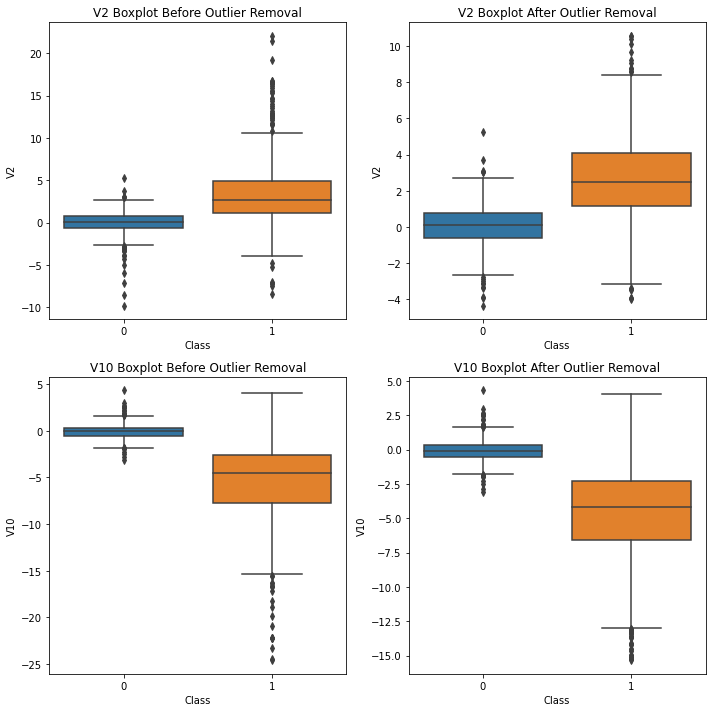

In [21]:
fig = plt.figure(figsize = (10,10))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

sns.boxplot(data=df2, x = "Class",y = "V2", ax = ax1)
ax1.set_title("V2 Boxplot Before Outlier Removal")

sns.boxplot(data=df3, x = "Class",y = "V2", ax = ax2)
ax2.set_title("V2 Boxplot After Outlier Removal")

sns.boxplot(data=df2, x = "Class",y = "V10", ax = ax3)
ax3.set_title("V10 Boxplot Before Outlier Removal")

sns.boxplot(data=df3, x = "Class",y = "V10", ax = ax4)
ax4.set_title("V10 Boxplot After Outlier Removal")

plt.tight_layout()
plt.show()

#### **Split to train and test dataset**

In [22]:
from sklearn.model_selection import train_test_split

X = df3.drop(["Class"],axis = 1)
Y = df3["Class"]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
x_train = x_train.values
x_test = x_test.values
y_train = y_train.values
y_test = y_test.values

display(x_train.shape)
display(x_test.shape)
display(y_train.shape)
display(y_test.shape)

(741, 30)

(186, 30)

(741,)

(186,)

# 5. **Basic Model Building**

Based on scientific article about credit card frauds, most effective modelling tools are
1. Naive Bayes
1. SVM
1. KNN
1. Logistic Regression (adding this to benchmark results)

Will attempt Pycaret analysing of models when able to install


In [23]:
# import mlflow
# import pycaret.classification as pyc

In [24]:
# Setup model building environment
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [25]:
clf_NB = GaussianNB()
clf_NB.fit(x_train,y_train)
print(f"Naive Bayes Score: {round(clf_NB.score(x_test,y_test)*100,2)}%")

clf_SVC = SVC()
clf_SVC.fit(x_train,y_train)
print(f"SVC Score: {round(clf_SVC.score(x_test,y_test)*100,2)}%")

clf_KNN = KNeighborsClassifier()
clf_KNN.fit(x_train,y_train)
print(f"KNN Score: {round(clf_KNN.score(x_test,y_test)*100,2)}%")

clf_LR = LogisticRegression()
clf_LR.fit(x_train,y_train)
print(f"Logistric Regression Score: {round(clf_LR.score(x_test,y_test)*100,2)}%")

Naive Bayes Score: 91.4%
SVC Score: 93.55%
KNN Score: 93.55%
Logistric Regression Score: 94.62%


**Logistic Regression and Support Vector Classifier has the highest score, however, will have to tune the model to find out what is the best parameters to run on the model. Will use Gridsearch**

# **6. Hyperparameter Tuning**

Use optuna to tune model

In [26]:
import optuna

# Considerations on Hyperparameter tuning
# LR_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
# SVC_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
# KNN_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

In [27]:
def SVC_objective(trial_SVC):
    kernel = trial_SVC.suggest_categorical("kernel", ["linear", "poly", "rbf",'sigmoid'])
    C = trial_SVC.suggest_float("C",0.10,0.15)
    gamma=trial_SVC.suggest_categorical('gamma',['auto','scale'])
    degree=trial_SVC.suggest_int("degree",1,3,log=True)
    
    model_SVC = SVC(kernel=kernel,C=C,gamma=gamma,degree=degree)
    model_SVC.fit(x_train,y_train)

    return model_SVC.score(x_test,y_test)

def LR_objective(trial_LR):
#     tol = trial_LR.suggest_uniform('tol' , 1e-6 , 1e-3),
    penalty = trial_LR.suggest_categorical("penalty", ["l1", "l2"])
    C = trial_LR.suggest_float("C",0.1,0.15)
#     fit_intercept = trial_LR.suggest_categorical('fit_intercept' , [True, False]),
#     random_state = trial_LR.suggest_categorical('random_state' , [42]),
    solver = trial_LR.suggest_categorical('solver' , ['liblinear'])
    
    model_LR = LogisticRegression(penalty=penalty,C=C,solver=solver)
    model_LR.fit(x_train,y_train)

    return model_LR.score(x_test,y_test)

def KNN_objective(trial_KNN):
    n_neighbors = trial_KNN.suggest_int("n_neighbors", 1, 30)
    algorithm = trial_KNN.suggest_categorical("algorithm",["auto","ball_tree","kd_tree","brute"])
#     weights = trial_KNN.suggest_categorical("weights", ['uniform', 'distance'])
#     metric = trial_KNN.suggest_categorical("metric", ['euclidean', 'manhattan', 'minkowski'])
    
    model_KNN = KNeighborsClassifier(n_neighbors=n_neighbors,algorithm=algorithm)
    model_KNN.fit(x_train,y_train)
    
    return model_KNN.score(x_test,y_test)

In [28]:
study_SVC = optuna.create_study(direction='maximize')
study_SVC.optimize(SVC_objective, n_trials=300)

[I 2022-07-22 02:49:30,844] A new study created in memory with name: no-name-af14e5bc-646e-471c-8485-2f46f2dfd5f4
[I 2022-07-22 02:49:30,861] Trial 0 finished with value: 0.9516129032258065 and parameters: {'kernel': 'linear', 'C': 0.11800642386846374, 'gamma': 'scale', 'degree': 1}. Best is trial 0 with value: 0.9516129032258065.
[I 2022-07-22 02:49:30,877] Trial 1 finished with value: 0.9516129032258065 and parameters: {'kernel': 'linear', 'C': 0.14223926779665017, 'gamma': 'scale', 'degree': 3}. Best is trial 0 with value: 0.9516129032258065.
[I 2022-07-22 02:49:30,904] Trial 2 finished with value: 0.9032258064516129 and parameters: {'kernel': 'sigmoid', 'C': 0.10610904296835927, 'gamma': 'scale', 'degree': 2}. Best is trial 0 with value: 0.9516129032258065.
[I 2022-07-22 02:49:30,918] Trial 3 finished with value: 0.9516129032258065 and parameters: {'kernel': 'linear', 'C': 0.10500453151910914, 'gamma': 'scale', 'degree': 1}. Best is trial 0 with value: 0.9516129032258065.
[I 2022-0

In [29]:
trial_SVC=study_SVC.best_trial
trial_SVC.params,trial_SVC.value

({'kernel': 'linear', 'C': 0.11800642386846374, 'gamma': 'scale', 'degree': 1},
 0.9516129032258065)

In [30]:
optuna.visualization.plot_param_importances(study_SVC)

In [31]:
study_LR = optuna.create_study(direction='maximize')
study_LR.optimize(LR_objective, n_trials=300)

[I 2022-07-22 02:49:40,576] A new study created in memory with name: no-name-f5059366-8aec-4c29-bfbc-972dd7aceef4
[I 2022-07-22 02:49:40,583] Trial 0 finished with value: 0.9516129032258065 and parameters: {'penalty': 'l1', 'C': 0.1439935731031834, 'solver': 'liblinear'}. Best is trial 0 with value: 0.9516129032258065.
[I 2022-07-22 02:49:40,589] Trial 1 finished with value: 0.9516129032258065 and parameters: {'penalty': 'l1', 'C': 0.1058425151302218, 'solver': 'liblinear'}. Best is trial 0 with value: 0.9516129032258065.
[I 2022-07-22 02:49:40,594] Trial 2 finished with value: 0.9516129032258065 and parameters: {'penalty': 'l1', 'C': 0.13980757202102861, 'solver': 'liblinear'}. Best is trial 0 with value: 0.9516129032258065.
[I 2022-07-22 02:49:40,600] Trial 3 finished with value: 0.9516129032258065 and parameters: {'penalty': 'l2', 'C': 0.11615548383729946, 'solver': 'liblinear'}. Best is trial 0 with value: 0.9516129032258065.
[I 2022-07-22 02:49:40,605] Trial 4 finished with value:

In [32]:
trial_LR=study_LR.best_trial
trial_LR.params,trial_LR.value

({'penalty': 'l1', 'C': 0.1439935731031834, 'solver': 'liblinear'},
 0.9516129032258065)

In [33]:
optuna.visualization.plot_param_importances(study_LR)

In [34]:
study_KNN = optuna.create_study(direction='maximize')
study_KNN.optimize(KNN_objective, n_trials=300)

[I 2022-07-22 02:49:44,789] A new study created in memory with name: no-name-373538d8-05b6-4eb2-904d-643424abd523
[I 2022-07-22 02:49:44,811] Trial 0 finished with value: 0.9139784946236559 and parameters: {'n_neighbors': 8, 'algorithm': 'brute'}. Best is trial 0 with value: 0.9139784946236559.
[I 2022-07-22 02:49:44,827] Trial 1 finished with value: 0.9086021505376344 and parameters: {'n_neighbors': 1, 'algorithm': 'auto'}. Best is trial 0 with value: 0.9139784946236559.
[I 2022-07-22 02:49:44,854] Trial 2 finished with value: 0.9301075268817204 and parameters: {'n_neighbors': 29, 'algorithm': 'ball_tree'}. Best is trial 2 with value: 0.9301075268817204.
[I 2022-07-22 02:49:44,884] Trial 3 finished with value: 0.9301075268817204 and parameters: {'n_neighbors': 30, 'algorithm': 'kd_tree'}. Best is trial 2 with value: 0.9301075268817204.
[I 2022-07-22 02:49:44,908] Trial 4 finished with value: 0.9354838709677419 and parameters: {'n_neighbors': 5, 'algorithm': 'ball_tree'}. Best is trial

In [35]:
trial_KNN=study_KNN.best_trial
trial_KNN.params,trial_KNN.value

({'n_neighbors': 5, 'algorithm': 'ball_tree'}, 0.9354838709677419)

In [36]:
optuna.visualization.plot_param_importances(study_KNN)